In [40]:
import pandas as pd
import numpy as np
import random


In [41]:
dfFlow = pd.read_csv("./data/food_flow_network_US-cities.csv")
dfRegions = pd.read_csv("./data/regions_description.csv")
dfDiversity = pd.read_csv("./data/diversity_US-cities.csv")

print(dfDiversity.head())

    ID  sector  diversity_2012  diversity_2013  diversity_2014  diversity_2015
0  101  animal        0.504571        0.505614        0.505372        0.505256
1  101    crop        0.724984        0.726144        0.768855        0.748384
2  101    feed        0.570448        0.565756        0.568316        0.565534
3  101    meat        0.734430        0.724947        0.739431        0.735322
4  102  animal        0.378877        0.379139        0.381346        0.381900


In [42]:
print("Food Flows")
print(dfFlow.head())
print("Region Description")
print(dfRegions.head())
print("Region Diversity")
print(dfDiversity.head())

Food Flows
   origin  destination  sector  tons_2012  tons_2013  tons_2014  tons_2015
0     101          101  animal   5.047236   5.020935   5.099104   5.206390
1     101          101    crop   0.054580   0.053380   0.059174   0.059911
2     101          101    feed   6.001596   6.192498   6.237931   6.369929
3     101          101    meat   0.453039   0.458094   0.460049   0.461909
4     101          102  animal  39.448790  41.622335  45.323130  47.220295
Region Description
    ID  State_FIPS                                    Name Region_type
0  101           1        Anniston-Oxford-Jacksonville, AL         MSA
1  102           1         Birmingham-Hoover-Talladega, AL         CSA
2  103           1  Chattanooga-Cleveland-Dalton, TN-GA-AL         CSA
3  104           1          Columbus-Auburn-Opelika, GA-AL         CSA
4  105           1             Dothan-Enterprise-Ozark, AL         CSA
Region Diversity
    ID  sector  diversity_2012  diversity_2013  diversity_2014  diversity_201

In [43]:
from collections import defaultdict 
nodeDiversity = defaultdict(list)

for index, row in dfDiversity.iterrows():
    nodeDiversity[row['ID']].append(row['diversity_2015'])

for id in nodeDiversity:
    nodeDiversity[id] = sum(nodeDiversity[id])/len(nodeDiversity[id])

nodeDiversity

defaultdict(list,
            {101: 0.6386241023734112,
             102: 0.549209704958835,
             103: 0.7438011247487074,
             104: 0.7464955525451153,
             105: 0.6933824045803116,
             106: 0.8004581650637347,
             107: 0.6371571915152963,
             108: 0.7362627195728422,
             109: 0.4415992899581836,
             110: 0.7321292050949304,
             111: 0.5818696572209274,
             199: 0.6904993052952562,
             401: 0.4879679205391887,
             402: 0.3939155018966649,
             403: 0.6364410730412061,
             404: 0.3746487605263097,
             405: 0.40361330484942387,
             406: 0.3463563640222104,
             407: 0.4088496792018141,
             499: 0.4727137617474785,
             501: 0.6880888975536087,
             502: 0.6943334014398804,
             503: 0.6044743621948205,
             504: 0.59242354509865,
             505: 0.6181270138847145,
             506: 0.71725222504412

In [44]:
adjacency_dict = dict()

for index, row in dfFlow.iterrows():
    if row['origin'] not in adjacency_dict:
        adjacency_dict[row['origin']] =[]
    curTuple = (row['destination'], row['tons_2015'])
    adjacency_dict[row['origin']].append(curTuple)


adjacency_dict

{101: [(101, 5.20638975),
  (101, 0.0599110025433148),
  (101, 6.3699289599999975),
  (101, 0.4619085487258096),
  (102, 47.22029499999999),
  (102, 0.8326253492962324),
  (102, 31.981184),
  (102, 0.3249081081081081),
  (103, 0.2403120840336134),
  (103, 0.6335806746971966),
  (103, 1.5263013333333335),
  (103, 0.3392093049128949),
  (104, 1.7439564264705882),
  (104, 0.0529268884321452),
  (104, 1.0054566753232723),
  (105, 15.61916925),
  (105, 0.4883646201288024),
  (105, 6.3699289599999975),
  (105, 0.9817133032509748),
  (106, 1.213341943251666),
  (106, 19.10978688),
  (106, 0.5800536956633142),
  (107, 1.73546325),
  (107, 0.0596672607007425),
  (107, 12.73985792),
  (107, 0.4107040424327712),
  (108, 34.709265),
  (108, 3.454669190536935),
  (108, 50.95943168),
  (108, 2.672872863938475),
  (109, 0.09669),
  (110, 3.4709265),
  (110, 0.188741557659226),
  (110, 25.47971584),
  (110, 1.4773010416004515),
  (111, 13.883706),
  (111, 0.2403893405588709),
  (111, 6.369928959999997

In [45]:

def calculate_total_incoming_weight(adjacency_dict):
    total_weight = {node: 0 for node in adjacency_dict}
    for node, connections in adjacency_dict.items():
        for connected_node, weight in connections:
            total_weight[connected_node] += weight

    return total_weight

def simulate_normal_distribution_removals(adjacency_dict, mean_percentage, std_dev_percentage):
    modified_adj_dict = {node: connections.copy() for node, connections in adjacency_dict.items()}
    initial_weights = calculate_total_incoming_weight(modified_adj_dict)
    all_connections = [(node, conn) for node, connections in modified_adj_dict.items() for conn in connections]
    num_connections = len(all_connections)
    num_removals = int(np.random.normal(mean_percentage * num_connections, std_dev_percentage * num_connections))
    num_removals = max(0, min(num_removals, num_connections))
    for _ in range(num_removals):
        if not all_connections:
            break
        removed_connection = random.choice(all_connections)
        modified_adj_dict[removed_connection[0]].remove(removed_connection[1])
        all_connections.remove(removed_connection)
    final_weights = calculate_total_incoming_weight(modified_adj_dict)
    resilience = {node: final_weights[node] / initial_weights[node] for node in modified_adj_dict}

    return resilience
mean_percentage = 0.5 
std_dev_percentage = 0.1
normal_distribution_resilience = simulate_normal_distribution_removals(adjacency_dict, mean_percentage, std_dev_percentage)
normal_distribution_resilience



{101: 0.6380943326216079,
 102: 0.6200135138987323,
 103: 0.4727564510757341,
 104: 0.47399604972884873,
 105: 0.41837154896318857,
 106: 0.6012494108379884,
 107: 0.39758371446198937,
 108: 0.47945350566581746,
 109: 0.3170161901694188,
 110: 0.38583036310996144,
 111: 0.7144985929113069,
 199: 0.5516130124882048,
 401: 0.6586321091735814,
 402: 0.5442351855396825,
 403: 0.31408774596833905,
 404: 0.30866207563437315,
 405: 0.61324517770457,
 406: 0.6006280819910425,
 407: 0.6449267100458839,
 499: 0.44398016645199556,
 501: 0.5160804112469024,
 502: 0.5262137863954673,
 503: 0.3970520710442161,
 504: 0.301961528233515,
 505: 0.5243380572576339,
 506: 0.3642858131086746,
 507: 0.4386681804452898,
 599: 0.3551373810308669,
 601: 0.26811090234470947,
 602: 0.35372810356269224,
 603: 0.19158997416186693,
 604: 0.3382346126286261,
 605: 0.5657088001891954,
 606: 0.2725799643758042,
 607: 0.6271304647982733,
 608: 0.44976326388044113,
 609: 0.5089907345323958,
 610: 0.3861629348255857,
 61

In [46]:
percentDif = []

for id in normal_distribution_resilience:
    percentDif.append(abs(normal_distribution_resilience[id]-nodeDiversity[id])/normal_distribution_resilience[id])

percentDif

[0.0008302373563274614,
 0.11419720272655498,
 0.5733283449781055,
 0.5748982570047809,
 0.6573364185462826,
 0.331324656016045,
 0.6025736677305757,
 0.535629025280342,
 0.3929865529018739,
 0.8975417050997461,
 0.1856251880776526,
 0.25178211837419473,
 0.259119144447017,
 0.27620353780315654,
 1.026316152765034,
 0.21378293642430282,
 0.3418402304276023,
 0.42334303971592224,
 0.3660524942861707,
 0.06471819569127009,
 0.3332978399453613,
 0.31948918745748245,
 0.5224057655840957,
 0.961917296432918,
 0.1788711601778645,
 0.9689271424637027,
 0.48428238713359817,
 1.0674887034053382,
 0.7708455952515412,
 0.1343657779602653,
 1.2871872912014901,
 0.5147709486837637,
 0.22994846403828248,
 0.6513038515678197,
 0.255121868347438,
 0.2695637140453562,
 0.11153319532826554,
 0.07874569500553753,
 0.5313494536662091,
 0.37016595199653696,
 0.085274894603324,
 0.3272016378423551,
 0.5470253548838673,
 0.5965311071730027,
 1.4143044601756982,
 0.5832209707616018,
 0.06497007721649443,
 0.5

In [47]:

ranges = []
temp  = np.arange(0.0, 1.0, 0.1)
print(temp)

for i in range(0, len(temp)-1):
    ranges.append((round(temp[i],1), round(temp[i+1],1)))
counts = [0] * len(ranges)
for value in percentDif:
    for i, (lower, upper) in enumerate(ranges):
        if lower <= value < upper:
            counts[i] += 1
            break


range_labels = [f"{lower}-{upper}" for lower, upper in ranges]

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


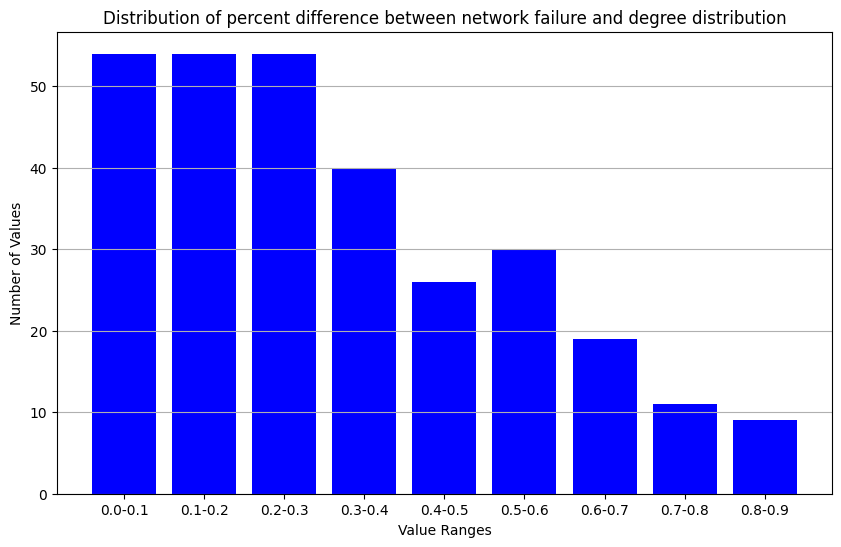

In [48]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range_labels, counts, color='blue')
plt.title("Distribution of percent difference between network failure and degree distribution")
plt.xlabel("Value Ranges")
plt.ylabel("Number of Values")
plt.xticks(range_labels)
plt.grid(axis='y')

plt.show()

In [49]:

dfDiversity['mean'] = np.mean(dfDiversity[[f'diversity_{year}' for year in range(2012, 2016)]].values, axis=1)
dfDiversity

ID  sector  diversity_2012  diversity_2013  diversity_2014  \
0      101  animal        0.504571        0.505614        0.505372   
1      101    crop        0.724984        0.726144        0.768855   
2      101    feed        0.570448        0.565756        0.568316   
3      101    meat        0.734430        0.724947        0.739431   
4      102  animal        0.378877        0.379139        0.381346   
...    ...     ...             ...             ...             ...   
1216  5602    meat        0.571128        0.513657        0.582538   
1217  5699  animal        0.278910        0.279186        0.279205   
1218  5699    crop        0.197331        0.190152        0.184148   
1219  5699    feed        0.397317        0.388548        0.404616   
1220  5699    meat        0.527652        0.517085        0.469619   

      diversity_2015      mean  
0           0.505256  0.505203  
1           0.748384  0.742092  
2           0.565534  0.567514  
3           0.735322  0.733533  
4           0.381900  0.380315  
...              ...       ...  
1216        0.579433  0.561689  
1217        0.279864  0.279291  
1218        0.182322  0.188488  
1219        0.418426  0.402227  
1220        0.467017  0.495343  

[1221 rows x 7 columns]

In [50]:
dfDiversity = dfDiversity.sort_values('mean')
dfDiversity

ID  sector  diversity_2012  diversity_2013  diversity_2014  \
709   3399  animal        0.001907        0.001801        0.001660   
199    999  animal        0.011874        0.011415        0.010379   
192    902    crop        0.025549        0.025099        0.023732   
1023  4804    meat        0.028996        0.030107        0.030386   
547   2301  animal        0.044909        0.044053        0.043566   
...    ...     ...             ...             ...             ...   
239   1207    meat        0.889671        0.883022        0.879923   
100    599    feed        0.897852        0.878487        0.872140   
672   2908    meat        0.866944        0.875159        0.907131   
580   2601    meat        0.884277        0.892423        0.889315   
386   1715    meat        0.897979        0.907673        0.923475   

      diversity_2015      mean  
709         0.001535  0.001726  
199         0.009475  0.010786  
192         0.022459  0.024210  
1023        0.029790  0.029820  
547         0.041721  0.043563  
...              ...       ...  
239         0.881991  0.883652  
100         0.899499  0.886994  
672         0.900511  0.887436  
580         0.888610  0.888656  
386         0.924501  0.913407  

[1221 rows x 7 columns]

In [51]:
dfDiversity.columns

Index(['ID', 'sector', 'diversity_2012', 'diversity_2013', 'diversity_2014',
       'diversity_2015', 'mean'],
      dtype='object')

In [52]:
years = ["2012","2013","2014","2015"]

In [53]:
binSizes = [204, 202, 204, 203, 206, 202]

In [54]:
bins = dict()
curBin =0
counter = 0
curDiv = 0
divList = []
for index, row in dfDiversity.iterrows():
    if counter == binSizes[curBin]:
        counter=0
        curBin+=1
        curDiv = curDiv/binSizes[curBin]

        divList.append(curDiv)
        curDiv = 0
    try:
        bins[curBin].append(index)
    except:
        bins[curBin] = []
        bins[curBin].append(index)
    curDiv+=row['mean']
    counter+=1
divList.append(curDiv/204)

bins



{0: [709,
  199,
  192,
  1023,
  547,
  175,
  701,
  1031,
  1092,
  1043,
  31,
  130,
  684,
  555,
  550,
  705,
  60,
  900,
  712,
  191,
  1097,
  901,
  710,
  677,
  269,
  229,
  139,
  181,
  681,
  1094,
  1100,
  168,
  171,
  896,
  897,
  569,
  164,
  162,
  529,
  178,
  1218,
  963,
  1096,
  138,
  176,
  973,
  984,
  1093,
  132,
  573,
  262,
  680,
  568,
  893,
  61,
  980,
  744,
  531,
  172,
  575,
  690,
  206,
  731,
  226,
  481,
  222,
  259,
  1033,
  548,
  142,
  184,
  670,
  200,
  47,
  892,
  908,
  245,
  554,
  823,
  650,
  1215,
  106,
  1217,
  572,
  233,
  391,
  253,
  334,
  429,
  131,
  67,
  952,
  694,
  241,
  1021,
  877,
  686,
  1095,
  551,
  218,
  207,
  114,
  1213,
  601,
  662,
  256,
  1173,
  661,
  215,
  1156,
  477,
  398,
  970,
  298,
  669,
  473,
  673,
  838,
  48,
  687,
  855,
  1032,
  460,
  1042,
  322,
  1030,
  352,
  764,
  309,
  1214,
  188,
  64,
  413,
  1022,
  1035,
  493,
  108,
  122,
  294,
  1165,

In [55]:

allAvgBins = dict()
allSciBins = dict()
for bin in bins.keys():
    allAvgBins[bin] = dict()
    allSciBins[bin] = dict()
    for index in bins[bin]:
        divRow = dfDiversity.loc[[index]]
        curID = divRow.iloc[0]["ID"]
        curSector = divRow.iloc[0]["sector"]
        if curID not in allAvgBins[bin]:
            allAvgBins[bin][curID] = dict()
            allSciBins[bin][curID] =  dict()
        if curSector not in allAvgBins[bin][curID]:
            allAvgBins[bin][curID][curSector] = dict()
            allSciBins[bin][curID][curSector] =  dict()
        
        tempdf = dfFlow.loc[(dfFlow['destination'] == curID) & (dfFlow['sector'] == curSector)]


        allVals = []
        for year in years:
            curYear = 'tons_' + year
            allVals.append(tempdf[curYear].sum())
        
        curAvg = sum(allVals)/len(years)
        curMin = min(allVals)

        # curYear = 'tons_' + years[countYear]
        # curAvg = tempdf[curYear].sum() / len(tempdf.index)
        # curMin = tempdf[curYear].min()
        Sci = (1-curMin/curAvg)*100


        # print(tempdf)
        # print(curMin, curAvg, Sci)
        # counter+=1
        # if counter == 3:
        #     return
        

        allAvgBins[bin][curID][curSector] = curAvg
        allSciBins[bin][curID][curSector] = Sci
    



In [56]:
allSciBins

{0: {3399: {'animal': 3.448675732148909,
   'meat': 6.825809338588373,
   'crop': 13.614546510060865},
  999: {'animal': 2.882564185024361, 'crop': 15.701634058415104},
  902: {'crop': 14.602387263506245, 'animal': 2.7165974760672285},
  4804: {'meat': 2.573172423359693,
   'crop': 7.472319895388124,
   'feed': 7.063175203695005},
  2301: {'animal': 2.2721622761321836, 'crop': 15.551085151116462},
  805: {'crop': 17.455154586952236, 'meat': 1.9239787585432988},
  3202: {'animal': 7.636216613646829},
  4807: {'crop': 7.091258692637581,
   'meat': 4.320369074854891,
   'feed': 3.849318573117688,
   'animal': 3.7595459834424916},
  4999: {'animal': 7.503606971671362,
   'feed': 3.6833030151472546,
   'crop': 18.845471992172737,
   'meat': 3.537508602890582},
  4812: {'crop': 9.047254900761226, 'animal': 3.321822942359498},
  109: {'feed': 5.602154964481166},
  608: {'animal': 4.900311863612117,
   'feed': 3.3433168486366793,
   'crop': 16.261443946457398},
  3003: {'crop': 17.895538676540

In [57]:
sVals = [3,10,5,15]

In [58]:
probSs = dict()
for bin in allSciBins:
    probSs[bin] = dict()
    
    for s in sVals:
        probSs[bin][s] = 0
    for id in allSciBins[bin]:
        for sector in allSciBins[bin][id]:
            for s in sVals:
                if  allSciBins[bin][id][sector] > s:
                    probSs[bin][s]+=1


for bin in probSs:
    binSize= binSizes[bin]
    for s in probSs[bin]:
        probSs[bin][s] = probSs[bin][s]/binSize

In [59]:
probSs

{0: {3: 0.8333333333333334,
  10: 0.4019607843137255,
  5: 0.6274509803921569,
  15: 0.25},
 1: {3: 0.7920792079207921,
  10: 0.3415841584158416,
  5: 0.5198019801980198,
  15: 0.17326732673267325},
 2: {3: 0.7794117647058824,
  10: 0.25980392156862747,
  5: 0.5245098039215687,
  15: 0.10294117647058823},
 3: {3: 0.6354679802955665,
  10: 0.21674876847290642,
  5: 0.3891625615763547,
  15: 0.07389162561576355},
 4: {3: 0.5825242718446602,
  10: 0.18446601941747573,
  5: 0.3106796116504854,
  15: 0.05339805825242718},
 5: {3: 0.4207920792079208,
  10: 0.08415841584158416,
  5: 0.22772277227722773,
  15: 0.0049504950495049506}}

In [60]:
sVals

[3, 10, 5, 15]

In [61]:
xMetric = np.linspace(0.0,1.0,11).tolist()
diversity = divList

shocks = dict()
for s in sVals:
    shocks[s] = []

for bin in probSs:
    for s in probSs[bin]:
        shocks[s].append(probSs[bin][s])



shocks

{3: [0.8333333333333334,
  0.7920792079207921,
  0.7794117647058824,
  0.6354679802955665,
  0.5825242718446602,
  0.4207920792079208],
 10: [0.4019607843137255,
  0.3415841584158416,
  0.25980392156862747,
  0.21674876847290642,
  0.18446601941747573,
  0.08415841584158416],
 5: [0.6274509803921569,
  0.5198019801980198,
  0.5245098039215687,
  0.3891625615763547,
  0.3106796116504854,
  0.22772277227722773],
 15: [0.25,
  0.17326732673267325,
  0.10294117647058823,
  0.07389162561576355,
  0.05339805825242718,
  0.0049504950495049506]}

In [62]:
import random
def randint (min= 0, max = 100):
    num = random.random()
    return num

In [63]:
shocks

{3: [0.8333333333333334,
  0.7920792079207921,
  0.7794117647058824,
  0.6354679802955665,
  0.5825242718446602,
  0.4207920792079208],
 10: [0.4019607843137255,
  0.3415841584158416,
  0.25980392156862747,
  0.21674876847290642,
  0.18446601941747573,
  0.08415841584158416],
 5: [0.6274509803921569,
  0.5198019801980198,
  0.5245098039215687,
  0.3891625615763547,
  0.3106796116504854,
  0.22772277227722773],
 15: [0.25,
  0.17326732673267325,
  0.10294117647058823,
  0.07389162561576355,
  0.05339805825242718,
  0.0049504950495049506]}

In [64]:
diversity

[0.2791006050613731,
 0.445735966536412,
 0.5451267208344058,
 0.6157024349657849,
 0.7253557015704248,
 0.7974311863165272]

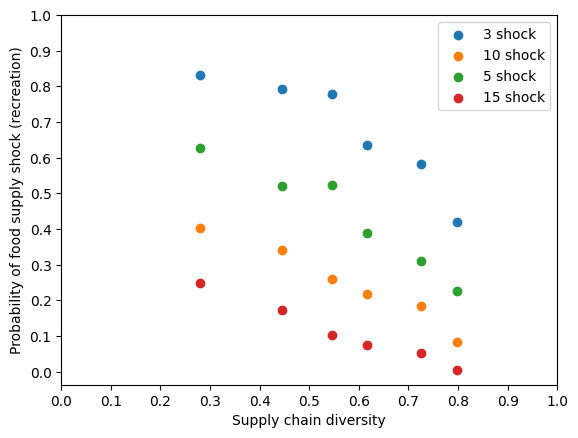

In [124]:
counter = 0
for shockLevel in shocks:
    curLabel = str(shockLevel)+" shock"
    plt.scatter(diversity,shocks[shockLevel], label = curLabel)
plt.xticks(xMetric)
plt.yticks(xMetric)
plt.xlabel("Supply chain diversity")
plt.ylabel("Probability of food supply shock (recreation)")
plt.legend()
plt.show()

correlation between exporters and diversiy

In [66]:
dfFlow

origin  destination  sector   tons_2012   tons_2013   tons_2014  \
0         101          101  animal    5.047236    5.020935    5.099104   
1         101          101    crop    0.054580    0.053380    0.059174   
2         101          101    feed    6.001596    6.192498    6.237931   
3         101          101    meat    0.453039    0.458094    0.460049   
4         101          102  animal   39.448790   41.622335   45.323130   
...       ...          ...     ...         ...         ...         ...   
87210    5699         5602    meat    0.335497    0.353955    0.377609   
87211    5699         5699  animal  150.960356  130.830000  139.153600   
87212    5699         5699    crop  151.203572  120.804150  157.861423   
87213    5699         5699    feed  444.848489  415.418489  465.116578   
87214    5699         5699    meat    1.427778    1.506333    1.606996   

        tons_2015  
0        5.206390  
1        0.059911  
2        6.369929  
3        0.461909  
4       47.220295  
...           ...  
87210    0.371322  
87211  142.542311  
87212  161.256521  
87213  471.621289  
87214    1.580241  

[87215 rows x 7 columns]

In [95]:
exporters = dict()
years = ['2012','2013','2014','2015']
for index, row in dfFlow.iterrows():
    for year in years:
        colName = "tons_"+ year
        tmp = str(row["origin"]) + '_'+ year
        exporters[tmp] = exporters.get(tmp,0.0)+float(row[colName])

In [96]:
exporters

{'101_2012': 456.0476518095365,
 '101_2013': 469.02607798742974,
 '101_2014': 472.7579145422672,
 '101_2015': 479.9923856142254,
 '102_2012': 882.5775999999997,
 '102_2013': 888.9528999999998,
 '102_2014': 874.1299000000004,
 '102_2015': 877.4280999999999,
 '103_2012': 1715.1499128694875,
 '103_2013': 1810.3602404940732,
 '103_2014': 1801.83435910598,
 '103_2015': 1826.1387561222657,
 '104_2012': 284.07758874349196,
 '104_2013': 287.00330647999607,
 '104_2014': 292.6812738028902,
 '104_2015': 294.0307477395544,
 '105_2012': 962.6636820355562,
 '105_2013': 982.5111213788854,
 '105_2014': 994.3673937246457,
 '105_2015': 1006.4949892151524,
 '106_2012': 843.0722078457643,
 '106_2013': 865.7992572578105,
 '106_2014': 887.1280623013752,
 '106_2015': 903.2981629171595,
 '107_2012': 643.0214721607039,
 '107_2013': 666.0269772226485,
 '107_2014': 668.5135259717782,
 '107_2015': 676.5583118643339,
 '108_2012': 4258.16409868528,
 '108_2013': 4362.727207770439,
 '108_2014': 4421.082888931845,
 '1

correlation between importers and diversity

In [112]:
importers = dict()
uniqueImporters = dict()
years = ['2012','2013','2014','2015']
for index, row in dfFlow.iterrows():
    for year in years:
        colName = "tons_"+ year
        tmp = str(row["destination"]) + '_'+ year
        importers[tmp] = importers.get(tmp,0.0)+float(row[colName])
        if tmp not in uniqueImporters:
            uniqueImporters[tmp] = set()
        uniqueImporters[tmp].add(row['origin'])


In [116]:
uniqueImporters

{'101_2012': 210,
 '101_2013': 210,
 '101_2014': 210,
 '101_2015': 210,
 '102_2012': 125,
 '102_2013': 125,
 '102_2014': 125,
 '102_2015': 125,
 '103_2012': 220,
 '103_2013': 220,
 '103_2014': 220,
 '103_2015': 220,
 '104_2012': 185,
 '104_2013': 185,
 '104_2014': 185,
 '104_2015': 185,
 '105_2012': 210,
 '105_2013': 210,
 '105_2014': 210,
 '105_2015': 210,
 '106_2012': 207,
 '106_2013': 207,
 '106_2014': 207,
 '106_2015': 207,
 '107_2012': 210,
 '107_2013': 210,
 '107_2014': 210,
 '107_2015': 210,
 '108_2012': 210,
 '108_2013': 210,
 '108_2014': 210,
 '108_2015': 210,
 '109_2012': 42,
 '109_2013': 42,
 '109_2014': 42,
 '109_2015': 42,
 '110_2012': 210,
 '110_2013': 210,
 '110_2014': 210,
 '110_2015': 210,
 '111_2012': 210,
 '111_2013': 210,
 '111_2014': 210,
 '111_2015': 210,
 '199_2012': 210,
 '199_2013': 210,
 '199_2014': 210,
 '199_2015': 210,
 '403_2012': 171,
 '403_2013': 171,
 '403_2014': 171,
 '403_2015': 171,
 '501_2012': 214,
 '501_2013': 214,
 '501_2014': 214,
 '501_2015': 2

In [114]:
for key in uniqueImporters:
    uniqueImporters[key] = len(uniqueImporters[key])

In [115]:
uniqueImporters

{'101_2012': 210,
 '101_2013': 210,
 '101_2014': 210,
 '101_2015': 210,
 '102_2012': 125,
 '102_2013': 125,
 '102_2014': 125,
 '102_2015': 125,
 '103_2012': 220,
 '103_2013': 220,
 '103_2014': 220,
 '103_2015': 220,
 '104_2012': 185,
 '104_2013': 185,
 '104_2014': 185,
 '104_2015': 185,
 '105_2012': 210,
 '105_2013': 210,
 '105_2014': 210,
 '105_2015': 210,
 '106_2012': 207,
 '106_2013': 207,
 '106_2014': 207,
 '106_2015': 207,
 '107_2012': 210,
 '107_2013': 210,
 '107_2014': 210,
 '107_2015': 210,
 '108_2012': 210,
 '108_2013': 210,
 '108_2014': 210,
 '108_2015': 210,
 '109_2012': 42,
 '109_2013': 42,
 '109_2014': 42,
 '109_2015': 42,
 '110_2012': 210,
 '110_2013': 210,
 '110_2014': 210,
 '110_2015': 210,
 '111_2012': 210,
 '111_2013': 210,
 '111_2014': 210,
 '111_2015': 210,
 '199_2012': 210,
 '199_2013': 210,
 '199_2014': 210,
 '199_2015': 210,
 '403_2012': 171,
 '403_2013': 171,
 '403_2014': 171,
 '403_2015': 171,
 '501_2012': 214,
 '501_2013': 214,
 '501_2014': 214,
 '501_2015': 2

In [98]:
importers

{'101_2012': 453.3246484175,
 '101_2013': 461.09326434193673,
 '101_2014': 479.3687437768807,
 '101_2015': 491.85380593385656,
 '102_2012': 3059.0059000000006,
 '102_2013': 3073.277700000002,
 '102_2014': 3303.121600000001,
 '102_2015': 3358.3998999999976,
 '103_2012': 1511.8689931722038,
 '103_2013': 1490.3858220068014,
 '103_2014': 1592.1609659383596,
 '103_2015': 1626.5581317928227,
 '104_2012': 332.5480441744102,
 '104_2013': 330.7563884911581,
 '104_2014': 352.85779749981566,
 '104_2015': 362.3079349501207,
 '105_2012': 1048.1933689548737,
 '105_2013': 1054.0899457584017,
 '105_2014': 1138.1802099233985,
 '105_2015': 1169.366877234954,
 '106_2012': 1273.277831279892,
 '106_2013': 1260.3171894665245,
 '106_2014': 1392.2187079357357,
 '106_2015': 1419.9479564257856,
 '107_2012': 544.4846534049475,
 '107_2013': 554.6287110297027,
 '107_2014': 567.2253753790195,
 '107_2015': 579.4935644981572,
 '108_2012': 4721.509121778728,
 '108_2013': 4708.620227880365,
 '108_2014': 5150.9117274635

In [99]:
diversityLoc = dict()
countLoc = dict()
years = ['2012','2013','2014','2015']
for index, row in dfDiversity.iterrows():
    for year in years:
        colName = "diversity_"+ year
        tmp = str(row["ID"]) + '_'+ year
        diversityLoc[tmp] = diversityLoc.get(tmp,0.0)+float(row[colName])
        countLoc[tmp]  = countLoc.get(tmp,0)+1



In [100]:
countLoc

{'3399_2012': 4,
 '3399_2013': 4,
 '3399_2014': 4,
 '3399_2015': 4,
 '999_2012': 3,
 '999_2013': 3,
 '999_2014': 3,
 '999_2015': 3,
 '902_2012': 4,
 '902_2013': 4,
 '902_2014': 4,
 '902_2015': 4,
 '4804_2012': 4,
 '4804_2013': 4,
 '4804_2014': 4,
 '4804_2015': 4,
 '2301_2012': 3,
 '2301_2013': 3,
 '2301_2014': 3,
 '2301_2015': 3,
 '805_2012': 3,
 '805_2013': 3,
 '805_2014': 3,
 '805_2015': 3,
 '3202_2012': 4,
 '3202_2013': 4,
 '3202_2014': 4,
 '3202_2015': 4,
 '4807_2012': 4,
 '4807_2013': 4,
 '4807_2014': 4,
 '4807_2015': 4,
 '4999_2012': 4,
 '4999_2013': 4,
 '4999_2014': 4,
 '4999_2015': 4,
 '4812_2012': 4,
 '4812_2013': 4,
 '4812_2014': 4,
 '4812_2015': 4,
 '109_2012': 3,
 '109_2013': 3,
 '109_2014': 3,
 '109_2015': 3,
 '608_2012': 4,
 '608_2013': 4,
 '608_2014': 4,
 '608_2015': 4,
 '3003_2012': 2,
 '3003_2013': 2,
 '3003_2014': 2,
 '3003_2015': 2,
 '2399_2012': 4,
 '2399_2013': 4,
 '2399_2014': 4,
 '2399_2015': 4,
 '2302_2012': 4,
 '2302_2013': 4,
 '2302_2014': 4,
 '2302_2015': 4,


In [101]:
diversityLoc

{'3399_2012': 0.7273955574164171,
 '3399_2013': 0.7108533892172879,
 '3399_2014': 0.7096698735685167,
 '3399_2015': 0.6272986652280578,
 '999_2012': 0.8067655949513002,
 '999_2013': 0.8290252120246772,
 '999_2014': 0.8371557554086173,
 '999_2015': 0.8438781278070909,
 '902_2012': 1.283424283990457,
 '902_2013': 1.2863509601074659,
 '902_2014': 1.289728904948051,
 '902_2015': 1.2983966807853367,
 '4804_2012': 1.0957107987525005,
 '4804_2013': 1.107770416953239,
 '4804_2014': 1.0846429395132788,
 '4804_2015': 1.079833879074418,
 '2301_2012': 1.0038273322676026,
 '2301_2013': 0.9899227970810751,
 '2301_2014': 0.9826629395363907,
 '2301_2015': 0.9961375422530092,
 '805_2012': 0.6615634852759267,
 '805_2013': 0.6484808398207733,
 '805_2014': 0.6574704169725267,
 '805_2015': 0.6439069824789287,
 '3202_2012': 1.691457765739247,
 '3202_2013': 1.6534290321797038,
 '3202_2014': 1.6933248485876349,
 '3202_2015': 1.6885777836428066,
 '4807_2012': 0.9704515470919501,
 '4807_2013': 0.966625694345735

In [102]:
for key in diversityLoc:
    diversityLoc[key] = diversityLoc[key] / countLoc[key]

In [103]:
diversityLoc

{'3399_2012': 0.1818488893541043,
 '3399_2013': 0.17771334730432198,
 '3399_2014': 0.17741746839212919,
 '3399_2015': 0.15682466630701444,
 '999_2012': 0.26892186498376675,
 '999_2013': 0.27634173734155904,
 '999_2014': 0.2790519184695391,
 '999_2015': 0.2812927092690303,
 '902_2012': 0.32085607099761426,
 '902_2013': 0.32158774002686646,
 '902_2014': 0.32243222623701273,
 '902_2015': 0.32459917019633416,
 '4804_2012': 0.27392769968812514,
 '4804_2013': 0.27694260423830974,
 '4804_2014': 0.2711607348783197,
 '4804_2015': 0.2699584697686045,
 '2301_2012': 0.3346091107558675,
 '2301_2013': 0.3299742656936917,
 '2301_2014': 0.3275543131787969,
 '2301_2015': 0.33204584741766974,
 '805_2012': 0.22052116175864223,
 '805_2013': 0.21616027994025777,
 '805_2014': 0.21915680565750892,
 '805_2015': 0.21463566082630958,
 '3202_2012': 0.4228644414348118,
 '3202_2013': 0.41335725804492596,
 '3202_2014': 0.4233312121469087,
 '3202_2015': 0.42214444591070166,
 '4807_2012': 0.24261288677298753,
 '4807_

importers and diversity correlation

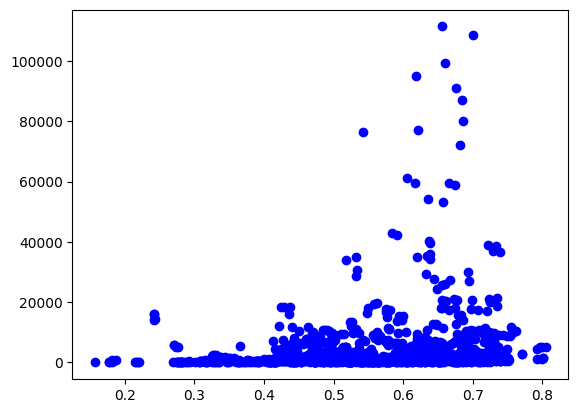

In [104]:
pointNames = list(diversityLoc.keys())
x_values = [diversityLoc[name] for name in pointNames]
y_values = [importers[name] for name in pointNames]

plt.scatter(x_values, y_values, color='blue')

Filtering

In [105]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [d for d in data if lower_bound <= d <= upper_bound]


In [106]:
filtered_y_names = [name for name in importers if importers[name] in remove_outliers(list(importers.values()))]

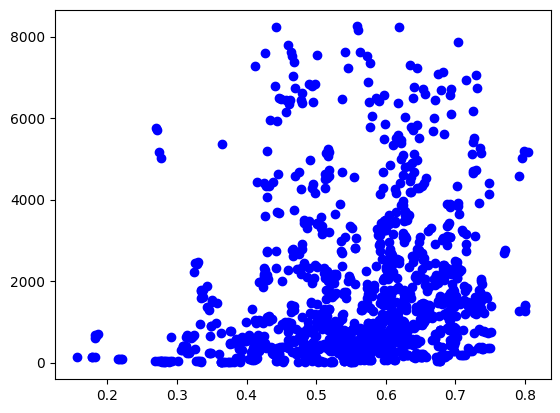

In [107]:
pointNames = list(filtered_y_names)
x_values = [diversityLoc[name] for name in pointNames]
y_values = [importers[name] for name in pointNames]

plt.scatter(x_values, y_values, color='blue')

exporters and diversity correlation

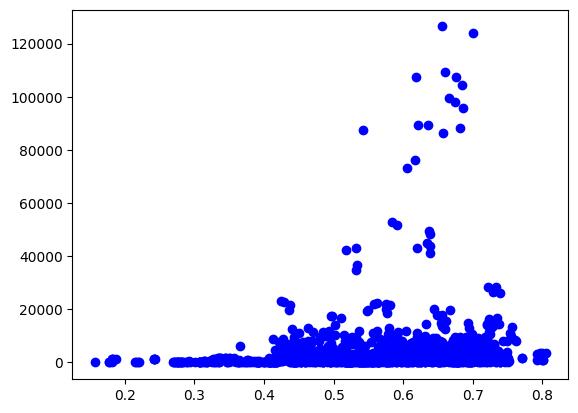

In [108]:
pointNames = list(diversityLoc.keys())
x_values = [diversityLoc[name] for name in pointNames]
y_values = [exporters[name] for name in pointNames]

plt.scatter(x_values, y_values, color='blue')

In [109]:
filtered_y_names = [name for name in exporters if exporters[name] in remove_outliers(list(exporters.values()))]


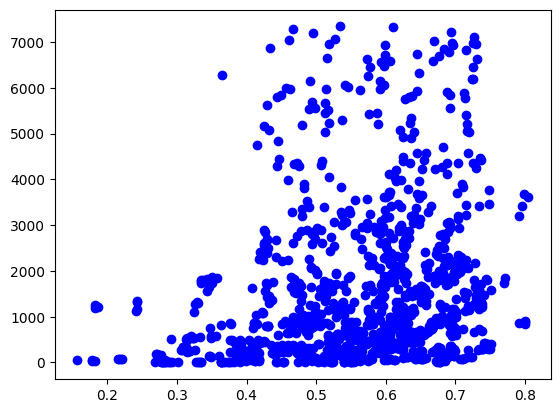

In [110]:
pointNames = list(filtered_y_names)
x_values = [diversityLoc[name] for name in pointNames]
y_values = [exporters[name] for name in pointNames]

plt.scatter(x_values, y_values, color='blue')

In [122]:
filtered_y_names = [name for name in uniqueImporters if uniqueImporters[name] in remove_outliers(list(uniqueImporters.values()))]

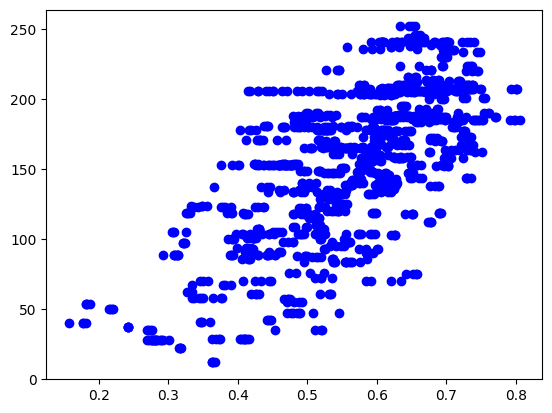

In [123]:
pointNames = list(filtered_y_names)
x_values = [diversityLoc[name] for name in pointNames]
y_values = [uniqueImporters[name] for name in pointNames]

plt.scatter(x_values, y_values, color='blue')